# NBA MVP Prediction

In [383]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor

### 1) Data Cleaning

In [384]:
mvps = pd.read_csv("data/mvps.csv", encoding="latin-1", delimiter=";")
mvps.head(10)

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
0,1,Michael Jordan,27,CHI,77,891,960,0.928,82,37.0,...,6.0,5.5,2.7,1.0,0.539,0.312,0.851,20.3,0.321,1991
1,2,Magic Johnson,31,LAL,10,497,960,0.518,79,37.1,...,7.0,12.5,1.3,0.2,0.477,0.320,0.906,15.4,0.251,1991
2,3,David Robinson,25,SAS,6,476,960,0.496,82,37.7,...,13.0,2.5,1.5,3.9,0.552,0.143,0.762,17.0,0.264,1991
3,4,Charles Barkley,27,PHI,2,222,960,0.231,67,37.3,...,10.1,4.2,1.6,0.5,0.570,0.284,0.722,13.4,0.258,1991
4,5,Karl Malone,27,UTA,0,142,960,0.148,82,40.3,...,11.8,3.3,1.1,1.0,0.527,0.286,0.770,15.5,0.225,1991
5,6,Clyde Drexler,28,POR,1,75,960,0.078,82,34.8,...,6.7,6.0,1.8,0.7,0.482,0.319,0.794,12.4,0.209,1991
6,7,Kevin Johnson,24,PHO,0,32,960,0.033,77,36.0,...,3.5,10.1,2.1,0.1,0.516,0.205,0.843,12.7,0.220,1991
7,8,Dominique Wilkins,31,ATL,0,29,960,0.030,81,38.0,...,9.0,3.3,1.5,0.8,0.470,0.341,0.829,11.4,0.177,1991
8,9T,Larry Bird,34,BOS,0,25,960,0.026,60,38.0,...,8.5,7.2,1.8,1.0,0.454,0.389,0.891,6.6,0.140,1991
9,9T,Terry Porter,27,POR,0,25,960,0.026,81,32.9,...,3.5,8.0,2.0,0.1,0.515,0.415,0.823,13.0,0.235,1991


In [385]:
mvps = mvps[["Player", "Year", "Pts Won", "Pts Max", "Share"]]

In [386]:
players = pd.read_csv("data/players.csv", encoding="latin-1", delimiter=";")
players.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Alaa Abdelnaby,PF,22,POR,43,0,6.7,1.3,2.7,...,0.6,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1,1991
1,2,Mahmoud Abdul-Rauf,PG,21,DEN,67,19,22.5,6.2,15.1,...,0.5,1.3,1.8,3.1,0.8,0.1,1.6,2.2,14.1,1991
2,3,Mark Acres,C,28,ORL,68,0,19.3,1.6,3.1,...,2.1,3.2,5.3,0.4,0.4,0.4,0.6,3.2,4.2,1991
3,4,Michael Adams,PG,28,DEN,66,66,35.5,8.5,21.5,...,0.9,3,3.9,10.5,2.2,0.1,3.6,2.5,26.5,1991
4,5,Mark Aguirre,SF,31,DET,78,13,25.7,5.4,11.7,...,1.7,3.1,4.8,1.8,0.6,0.3,1.6,2.7,14.2,1991


In [387]:
players["Player"] = players["Player"].str.replace("*", "", regex=False)

In [388]:
players.head(50)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Alaa Abdelnaby,PF,22,POR,43,0,6.7,1.3,2.7,...,0.6,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1,1991
1,2,Mahmoud Abdul-Rauf,PG,21,DEN,67,19,22.5,6.2,15.1,...,0.5,1.3,1.8,3.1,0.8,0.1,1.6,2.2,14.1,1991
2,3,Mark Acres,C,28,ORL,68,0,19.3,1.6,3.1,...,2.1,3.2,5.3,0.4,0.4,0.4,0.6,3.2,4.2,1991
3,4,Michael Adams,PG,28,DEN,66,66,35.5,8.5,21.5,...,0.9,3,3.9,10.5,2.2,0.1,3.6,2.5,26.5,1991
4,5,Mark Aguirre,SF,31,DET,78,13,25.7,5.4,11.7,...,1.7,3.1,4.8,1.8,0.6,0.3,1.6,2.7,14.2,1991
5,6,Danny Ainge,SG,31,POR,80,0,21.4,4.2,8.9,...,0.6,2,2.6,3.6,0.8,0.2,1.3,2.4,11.1,1991
6,7,Mark Alarie,PF,27,WSB,42,1,14,2.4,5.4,...,1,1.8,2.8,1.1,0.4,0.2,1,2.1,5.8,1991
7,8,Steve Alford,PG,26,DAL,34,0,6.9,1.7,3.4,...,0.3,0.4,0.7,0.6,0.2,0,0.5,0.3,4.4,1991
8,9,Greg Anderson,PF,26,TOT,68,2,13.6,1.7,4,...,1.4,3.3,4.7,0.2,0.5,0.7,1.2,2.1,4.3,1991
9,9,Greg Anderson,PF,26,MIL,26,0,9.5,1,2.8,...,1,1.9,2.9,0.1,0.3,0.3,0.8,1.1,2.7,1991


In [389]:
players.groupby(["Player", "Year"])

1.1) If player played for multiple teams in a season we take the row with his total stats from all teams.

In [390]:
def single_row(df):
    if df.shape[0] == 1:
        return df
    else:
        row = df[df["Tm"] == "TOT"]
        row["Tm"] = df.iloc[-1,:]["Tm"]
        return row
    
players = players.groupby(["Player", "Year"]).apply(single_row)

In [391]:
players.head(10)

Rk           Player Pos Age   Tm   G  GS    MP  \
Player          Year                                                         
?an Tabak       1995 2311  355        ?an Tabak   C  24  HOU  37   0   4.9   
                1996 2862  376        ?an Tabak   C  25  TOR  67  18  19.9   
                1997 3461  385        ?an Tabak   C  26  TOR  13   4  16.8   
                1998 4013  381        ?an Tabak   C  27  BOS  57  34  17.3   
                2000 5080  387        ?an Tabak   C  29  IND  18   0   6.3   
                2001 5642  394        ?an Tabak   C  30  IND  55  14  14.1   
?arko ?abarkapa 2004 6818   67  ?arko ?abarkapa  PF  22  PHO  49   4  11.6   
                2005 7422   68  ?arko ?abarkapa  PF  23  GSW  40   0  11.9   
                2006 8029   69  ?arko ?abarkapa  PF  24  GSW  61   0   8.3   
?eljko Rebra?a  2002 6095  336   ?eljko Rebra?a   C  29  DET  74   4  15.9   

                            FG  FGA  ...  ORB  DRB  TRB  AST  STL  BLK  TOV  \
Player          Year                 ...                                      
?an Tabak       1995 2311  0.6  1.4  ...  0.6  0.9  1.5  0.1  0.1  0.2  0.5   
                1996 2862  3.4  6.2  ...  1.7    3  4.8  0.9  0.4  0.5  1.5   
                1997 3461  2.5  5.5  ...  1.5  2.2  3.8  1.1  0.5  0.8  1.6   
                1998 4013  2.5  5.3  ...  1.5  2.2  3.7  0.8  0.4  0.7  1.1   
                2000 5080  0.9  1.9  ...  0.9  0.9  1.8  0.2  0.2  0.5  0.6   
                2001 5642  1.8  3.4  ...  1.2  2.7  3.9  0.6  0.2  0.5    1   
?arko ?abarkapa 2004 6818  1.7    4  ...  0.5  1.5    2  0.8  0.2  0.3  1.1   
                2005 7422  2.2  4.4  ...  0.9  1.7  2.6  0.6  0.3  0.1  0.8   
                2006 8029  1.1  2.9  ...  0.6  1.2  1.8  0.3  0.2  0.1  0.6   
?eljko Rebra?a  2002 6095  2.6  5.1  ...  1.1  2.8  3.9  0.5  0.4    1  1.1   

                            PF  PTS  Year  
Player          Year                       
?an Tabak       1995 2311    1    2  1995  
                1996 2862    3  7.7  1996  
                1997 3461  2.7  6.5  1997  
                1998 4013  2.9  5.4  1998  
                2000 5080  0.7  2.1  2000  
                2001 5642  2.3  3.9  2001  
?arko ?abarkapa 2004 6818  1.5  4.1  2004  
                2005 7422  1.5    6  2005  
                2006 8029  1.4  3.3  2006  
?eljko Rebra?a  2002 6095  2.6  6.9  2002  

[10 rows x 31 columns]

In [392]:
players.index = players.index.droplevel()

In [393]:
players.index = players.index.droplevel()

In [394]:
players[players["Player"] == "Greg Anderson"]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
8,9,Greg Anderson,PF,26,DEN,68,2,13.6,1.7,4,...,1.4,3.3,4.7,0.2,0.5,0.7,1.2,2.1,4.3,1991
467,9,Greg Anderson,PF,27,DEN,82,82,34.1,4.7,10.4,...,4.1,7.4,11.5,1,1.1,0.8,2.5,3.2,11.5,1992
1412,9,Greg Anderson,PF,29,DET,77,47,21.1,2.6,4.8,...,2.4,5,7.4,0.7,0.7,0.9,1.2,3,6.4,1994
1911,8,Greg Anderson,PF,30,ATL,51,0,12.2,1.1,2,...,1.2,2.5,3.7,0.3,0.5,0.6,0.6,2,2.9,1995
2381,9,Greg Anderson,PF,31,SAS,46,7,7.5,0.5,1,...,0.6,1.5,2.2,0.2,0.2,0.5,0.5,1.4,1.2,1996
2948,9,Greg Anderson,C,32,SAS,82,48,20.2,1.6,3.2,...,1.9,3.5,5.5,0.4,0.8,0.8,0.9,2.7,3.9,1997
3541,7,Greg Anderson,C,33,ATL,50,0,8,0.7,1.6,...,0.8,1.6,2.4,0.3,0.4,0.2,0.3,1.7,1.8,1998


1.2) Merging the NBA MVP data with the NBA player stats data.

In [395]:
combined = players.merge(mvps, how="outer", on=["Player", "Year"])

In [396]:
combined[["Pts Won", "Pts Max", "Share"]] = combined[["Pts Won", "Pts Max", "Share"]].fillna(0)

In [397]:
combined

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
0,355,?an Tabak,C,24,HOU,37,0,4.9,0.6,1.4,...,0.1,0.1,0.2,0.5,1,2,1995,0.0,0.0,0.0
1,376,?an Tabak,C,25,TOR,67,18,19.9,3.4,6.2,...,0.9,0.4,0.5,1.5,3,7.7,1996,0.0,0.0,0.0
2,385,?an Tabak,C,26,TOR,13,4,16.8,2.5,5.5,...,1.1,0.5,0.8,1.6,2.7,6.5,1997,0.0,0.0,0.0
3,381,?an Tabak,C,27,BOS,57,34,17.3,2.5,5.3,...,0.8,0.4,0.7,1.1,2.9,5.4,1998,0.0,0.0,0.0
4,387,?an Tabak,C,29,IND,18,0,6.3,0.9,1.9,...,0.2,0.2,0.5,0.6,0.7,2.1,2000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14087,24,Ömer Aþýk,C,27,HOU,48,19,20.2,2.1,4,...,0.5,0.3,0.8,1.2,1.9,5.8,2014,0.0,0.0,0.0
14088,24,Ömer Aþýk,C,28,NOP,76,76,26.1,2.8,5.4,...,0.9,0.4,0.7,1.3,1.9,7.3,2015,0.0,0.0,0.0
14089,26,Ömer Aþýk,C,29,NOP,68,64,17.3,1.5,2.9,...,0.4,0.3,0.3,0.9,1.8,4,2016,0.0,0.0,0.0
14090,21,Ömer Aþýk,C,30,NOP,31,19,15.5,1,2.1,...,0.5,0.2,0.3,0.5,1.6,2.7,2017,0.0,0.0,0.0


In [398]:
teams = pd.read_csv("data/teams.csv", encoding="latin-1", delimiter=";")
teams.head(30)

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,56,26,0.683,,111.5,105.7,5.22,1991,Boston Celtics*
1,44,38,0.537,12,105.4,105.6,-0.39,1991,Philadelphia 76ers*
2,39,43,0.476,17,103.1,103.3,-0.43,1991,New York Knicks*
3,30,52,0.366,26,101.4,106.4,-4.84,1991,Washington Bullets
4,26,56,0.317,30,102.9,107.5,-4.53,1991,New Jersey Nets
5,24,58,0.293,32,101.8,107.8,-5.91,1991,Miami Heat
6,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,1991,Central Division
7,61,21,0.744,,110,101,8.57,1991,Chicago Bulls*
8,50,32,0.61,11,100.1,96.8,3.08,1991,Detroit Pistons*
9,48,34,0.585,13,106.4,104,2.33,1991,Milwaukee Bucks*


1.3) Removing the columns with divisions.

In [399]:
division = ["Atlantic Division", "Central Division", "Midwest Division", "Pacific Division"]
teams = teams[~teams["W"].str.contains("Division")]
teams.head(30)

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,56,26,0.683,,111.5,105.7,5.22,1991,Boston Celtics*
1,44,38,0.537,12,105.4,105.6,-0.39,1991,Philadelphia 76ers*
2,39,43,0.476,17,103.1,103.3,-0.43,1991,New York Knicks*
3,30,52,0.366,26,101.4,106.4,-4.84,1991,Washington Bullets
4,26,56,0.317,30,102.9,107.5,-4.53,1991,New Jersey Nets
5,24,58,0.293,32,101.8,107.8,-5.91,1991,Miami Heat
7,61,21,0.744,,110,101,8.57,1991,Chicago Bulls*
8,50,32,0.61,11,100.1,96.8,3.08,1991,Detroit Pistons*
9,48,34,0.585,13,106.4,104,2.33,1991,Milwaukee Bucks*
10,43,39,0.524,18,109.8,109,0.72,1991,Atlanta Hawks*


In [400]:
teams["Team"] = teams["Team"].str.replace("*", "", regex=False)
teams.head(30)

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,56,26,0.683,,111.5,105.7,5.22,1991,Boston Celtics
1,44,38,0.537,12,105.4,105.6,-0.39,1991,Philadelphia 76ers
2,39,43,0.476,17,103.1,103.3,-0.43,1991,New York Knicks
3,30,52,0.366,26,101.4,106.4,-4.84,1991,Washington Bullets
4,26,56,0.317,30,102.9,107.5,-4.53,1991,New Jersey Nets
5,24,58,0.293,32,101.8,107.8,-5.91,1991,Miami Heat
7,61,21,0.744,,110,101,8.57,1991,Chicago Bulls
8,50,32,0.61,11,100.1,96.8,3.08,1991,Detroit Pistons
9,48,34,0.585,13,106.4,104,2.33,1991,Milwaukee Bucks
10,43,39,0.524,18,109.8,109,0.72,1991,Atlanta Hawks


1.4) Creating a dictionary with team names and their abbreviations and adding a row with the full team name to our dataframe.

In [401]:
team_short = {}

with open("data/nicknames.csv") as file:
    lines = file.readlines()
    for line in lines[1:]:
        abbrev, name = line.replace("\n", "").split(";")
        team_short[abbrev] = name
        
team_short

{'ATL': 'Atlanta Hawks',
 'BRK': 'Brooklyn Nets',
 'BKN': 'Brooklyn Nets',
 'BOS': 'Boston Celtics',
 'CHA': 'Charlotte Bobcats',
 'CHH': 'Charlotte Hornets',
 'CHO': 'Charlotte Hornets',
 'CHI': 'Chicago Bulls',
 'CLE': 'Cleveland Cavaliers',
 'DAL': 'Dallas Mavericks',
 'DEN': 'Denver Nuggets',
 'DET': 'Detroit Pistons',
 'GSW': 'Golden State Warriors',
 'HOU': 'Houston Rockets',
 'IND': 'Indiana Pacers',
 'LAC': 'Los Angeles Clippers',
 'LAL': 'Los Angeles Lakers',
 'MEM': 'Memphis Grizzlies',
 'MIA': 'Miami Heat',
 'MIL': 'Milwaukee Bucks',
 'MIN': 'Minnesota Timberwolves',
 'NJN': 'New Jersey Nets',
 'NOH': 'New Orleans Hornets',
 'NOP': 'New Orleans Pelicans',
 'NOK': 'New Orleans/Oklahoma City Hornets',
 'NYK': 'New York Knicks',
 'OKC': 'Oklahoma City Thunder',
 'ORL': 'Orlando Magic',
 'PHI': 'Philadelphia 76ers',
 'PHX': 'Phoenix Suns',
 'PHO': 'Phoenix Suns',
 'POR': 'Portland Trail Blazers',
 'SEA': 'Seattle SuperSonics',
 'SAC': 'Sacramento Kings',
 'SAS': 'San Antonio Spu

In [402]:
combined["Team"] = combined["Tm"].map(team_short)

In [403]:
combined.head(30)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team
0,355,?an Tabak,C,24,HOU,37,0,4.9,0.6,1.4,...,0.1,0.2,0.5,1,2,1995,0.0,0.0,0.0,Houston Rockets
1,376,?an Tabak,C,25,TOR,67,18,19.9,3.4,6.2,...,0.4,0.5,1.5,3,7.7,1996,0.0,0.0,0.0,Toronto Raptors
2,385,?an Tabak,C,26,TOR,13,4,16.8,2.5,5.5,...,0.5,0.8,1.6,2.7,6.5,1997,0.0,0.0,0.0,Toronto Raptors
3,381,?an Tabak,C,27,BOS,57,34,17.3,2.5,5.3,...,0.4,0.7,1.1,2.9,5.4,1998,0.0,0.0,0.0,Boston Celtics
4,387,?an Tabak,C,29,IND,18,0,6.3,0.9,1.9,...,0.2,0.5,0.6,0.7,2.1,2000,0.0,0.0,0.0,Indiana Pacers
5,394,?an Tabak,C,30,IND,55,14,14.1,1.8,3.4,...,0.2,0.5,1,2.3,3.9,2001,0.0,0.0,0.0,Indiana Pacers
6,67,?arko ?abarkapa,PF,22,PHO,49,4,11.6,1.7,4,...,0.2,0.3,1.1,1.5,4.1,2004,0.0,0.0,0.0,Phoenix Suns
7,68,?arko ?abarkapa,PF,23,GSW,40,0,11.9,2.2,4.4,...,0.3,0.1,0.8,1.5,6,2005,0.0,0.0,0.0,Golden State Warriors
8,69,?arko ?abarkapa,PF,24,GSW,61,0,8.3,1.1,2.9,...,0.2,0.1,0.6,1.4,3.3,2006,0.0,0.0,0.0,Golden State Warriors
9,336,?eljko Rebra?a,C,29,DET,74,4,15.9,2.6,5.1,...,0.4,1,1.1,2.6,6.9,2002,0.0,0.0,0.0,Detroit Pistons


1.5) Merging the players data with the team data.

In [404]:
stats = combined.merge(teams, how="outer", on=["Team","Year"])
stats

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,355,?an Tabak,C,24,HOU,37,0,4.9,0.6,1.4,...,0.0,0.0,Houston Rockets,47,35,0.573,15,103.5,101.4,2.32
1,53,Adrian Caldwell,PF,28,HOU,7,0,4.3,0.1,0.6,...,0.0,0.0,Houston Rockets,47,35,0.573,15,103.5,101.4,2.32
2,159,Carl Herrera,PF,28,HOU,61,26,21.8,2.8,5.4,...,0.0,0.0,Houston Rockets,47,35,0.573,15,103.5,101.4,2.32
3,183,Charles Jones,PF,37,HOU,3,0,12,0.3,1,...,0.0,0.0,Houston Rockets,47,35,0.573,15,103.5,101.4,2.32
4,42,Chucky Brown,SF,26,HOU,41,14,19.9,2.6,4.2,...,0.0,0.0,Houston Rockets,47,35,0.573,15,103.5,101.4,2.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14087,185,Spencer Hawes,PF,28,MIL,54,1,14.8,2.5,5.1,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9,103.6,103.8,-0.45
14088,331,Steve Novak,PF,33,MIL,8,0,2.8,0.3,0.9,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9,103.6,103.8,-0.45
14089,239,Terrence Jones,PF,25,MIL,54,12,23.5,4.3,9.1,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9,103.6,103.8,-0.45
14090,281,Thon Maker,C,19,MIL,57,34,9.9,1.5,3.2,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9,103.6,103.8,-0.45


In [405]:
stats = stats.apply(pd.to_numeric, errors="ignore")

In [406]:
stats.dtypes

Rk           int64
Player      object
Pos         object
Age          int64
Tm          object
G            int64
GS           int64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W            int64
L            int64
W/L%       float64
GB          object
PS/G       float64
PA/G       float64
SRS        float64
dtype: object

In [407]:
stats["GB"].unique()

array(['15', '51', '39', '19', '\x97', '11', '27', '28', '20', '33', '25',
       '7', '5', '14', '23', '40', '42', '18', '6', '24', '26', '37',
       '29', '21', '8', '1', '13', '17', '3', '9', '2', '35', '16', '41',
       '12', '50', '10', '30', '34', '4', '1.5', '22', '36', '43', '18.5',
       '48', '46', '10.5', '32', '38', '31', '21.5', '45', '22.5', '25.5',
       '3.5', '20.5', '11.5', '44', '52', '56', '2.5', '12.5', '47',
       '32.5', '4.5'], dtype=object)

In [408]:
stats["GB"] = stats["GB"].str.replace("\x97", "0")

In [409]:
stats["GB"].unique()

array(['15', '51', '39', '19', '0', '11', '27', '28', '20', '33', '25',
       '7', '5', '14', '23', '40', '42', '18', '6', '24', '26', '37',
       '29', '21', '8', '1', '13', '17', '3', '9', '2', '35', '16', '41',
       '12', '50', '10', '30', '34', '4', '1.5', '22', '36', '43', '18.5',
       '48', '46', '10.5', '32', '38', '31', '21.5', '45', '22.5', '25.5',
       '3.5', '20.5', '11.5', '44', '52', '56', '2.5', '12.5', '47',
       '32.5', '4.5'], dtype=object)

In [410]:
stats = stats.apply(pd.to_numeric, errors="ignore")

In [411]:
stats.dtypes

Rk           int64
Player      object
Pos         object
Age          int64
Tm          object
G            int64
GS           int64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W            int64
L            int64
W/L%       float64
GB         float64
PS/G       float64
PA/G       float64
SRS        float64
dtype: object

In [412]:
highest_scoring = stats[stats["G"] > 70].sort_values("PTS", ascending=False).head(10)
highest_scoring

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
9701,207,James Harden,PG,29,HOU,78,78,36.8,10.8,24.5,...,1010.0,0.768,Houston Rockets,53,29,0.646,0.0,113.9,109.1,4.96
1262,59,Kobe Bryant,SG,27,LAL,80,80,41.0,12.2,27.2,...,1250.0,0.386,Los Angeles Lakers,45,37,0.549,9.0,99.4,96.9,2.53
4534,197,Allen Iverson,PG,30,PHI,72,72,43.1,11.3,25.3,...,1250.0,0.001,Philadelphia 76ers,38,44,0.463,11.0,99.4,101.3,-2.10
10020,177,Michael Jordan,SG,29,CHI,78,78,39.3,12.7,25.7,...,980.0,0.577,Chicago Bulls,57,25,0.695,0.0,105.2,98.9,6.19
6954,248,Tracy McGrady,SG,23,ORL,75,74,39.4,11.1,24.2,...,1190.0,0.359,Orlando Magic,42,40,0.512,7.0,98.5,98.4,-0.39
6397,134,Kevin Durant,SF,25,OKC,81,81,38.5,10.5,20.8,...,1250.0,0.986,Oklahoma City Thunder,59,23,0.720,0.0,106.2,99.8,6.66
6449,458,Russell Westbrook,PG,28,OKC,81,81,34.6,10.2,24.0,...,1010.0,0.879,Oklahoma City Thunder,47,35,0.573,4.0,106.6,105.8,1.14
1276,64,Kobe Bryant,SG,28,LAL,77,77,40.8,10.6,22.8,...,1290.0,0.404,Los Angeles Lakers,42,40,0.512,19.0,103.3,103.4,0.24
9994,175,Michael Jordan,SG,27,CHI,82,82,37.0,12.1,22.4,...,960.0,0.928,Chicago Bulls,61,21,0.744,0.0,110.0,101.0,8.57
3372,207,LeBron James,SF,21,CLE,79,79,42.5,11.1,23.1,...,1250.0,0.550,Cleveland Cavaliers,50,32,0.610,14.0,97.6,95.4,2.17


In [413]:
stats.groupby("Year").apply(lambda x: x.sort_values("PTS", ascending=False).head(1))

,,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
Year,,,,,,,,,,,,,,,,,,,,,,
1991,9994,175,Michael Jordan,SG,27,CHI,82,82,37.0,12.1,22.4,...,960.0,0.928,Chicago Bulls,61,21,0.744,0.0,110.0,101.0,8.57
1992,10007,180,Michael Jordan,SG,28,CHI,80,80,38.8,11.8,22.7,...,960.0,0.938,Chicago Bulls,67,15,0.817,0.0,109.9,99.5,10.07
1993,10020,177,Michael Jordan,SG,29,CHI,78,78,39.3,12.7,25.7,...,980.0,0.577,Chicago Bulls,57,25,0.695,0.0,105.2,98.9,6.19
1994,8751,313,David Robinson,C,28,SAS,80,80,40.5,10.5,20.7,...,1010.0,0.723,San Antonio Spurs,55,27,0.671,3.0,100.0,94.8,5.05
1995,7431,264,Shaquille O'Neal,C,22,ORL,79,79,37.0,11.8,20.2,...,1050.0,0.576,Orlando Magic,57,25,0.695,0.0,110.9,103.8,6.44
1996,10527,190,Michael Jordan,SG,32,CHI,82,82,37.7,11.2,22.6,...,1130.0,0.986,Chicago Bulls,72,10,0.878,0.0,105.2,92.9,11.80
1997,10541,192,Michael Jordan,SG,33,CHI,82,82,37.9,11.2,23.1,...,1150.0,0.832,Chicago Bulls,69,13,0.841,0.0,103.1,92.3,10.70
1998,10555,203,Michael Jordan,SG,34,CHI,82,82,38.8,10.7,23.1,...,1160.0,0.934,Chicago Bulls,62,20,0.756,0.0,96.7,89.6,7.24
1999,1148,178,Allen Iverson,SG,23,PHI,48,48,41.5,9.1,22.0,...,1180.0,0.270,Philadelphia 76ers,28,22,0.560,5.0,89.7,87.6,2.56


<Axes: >

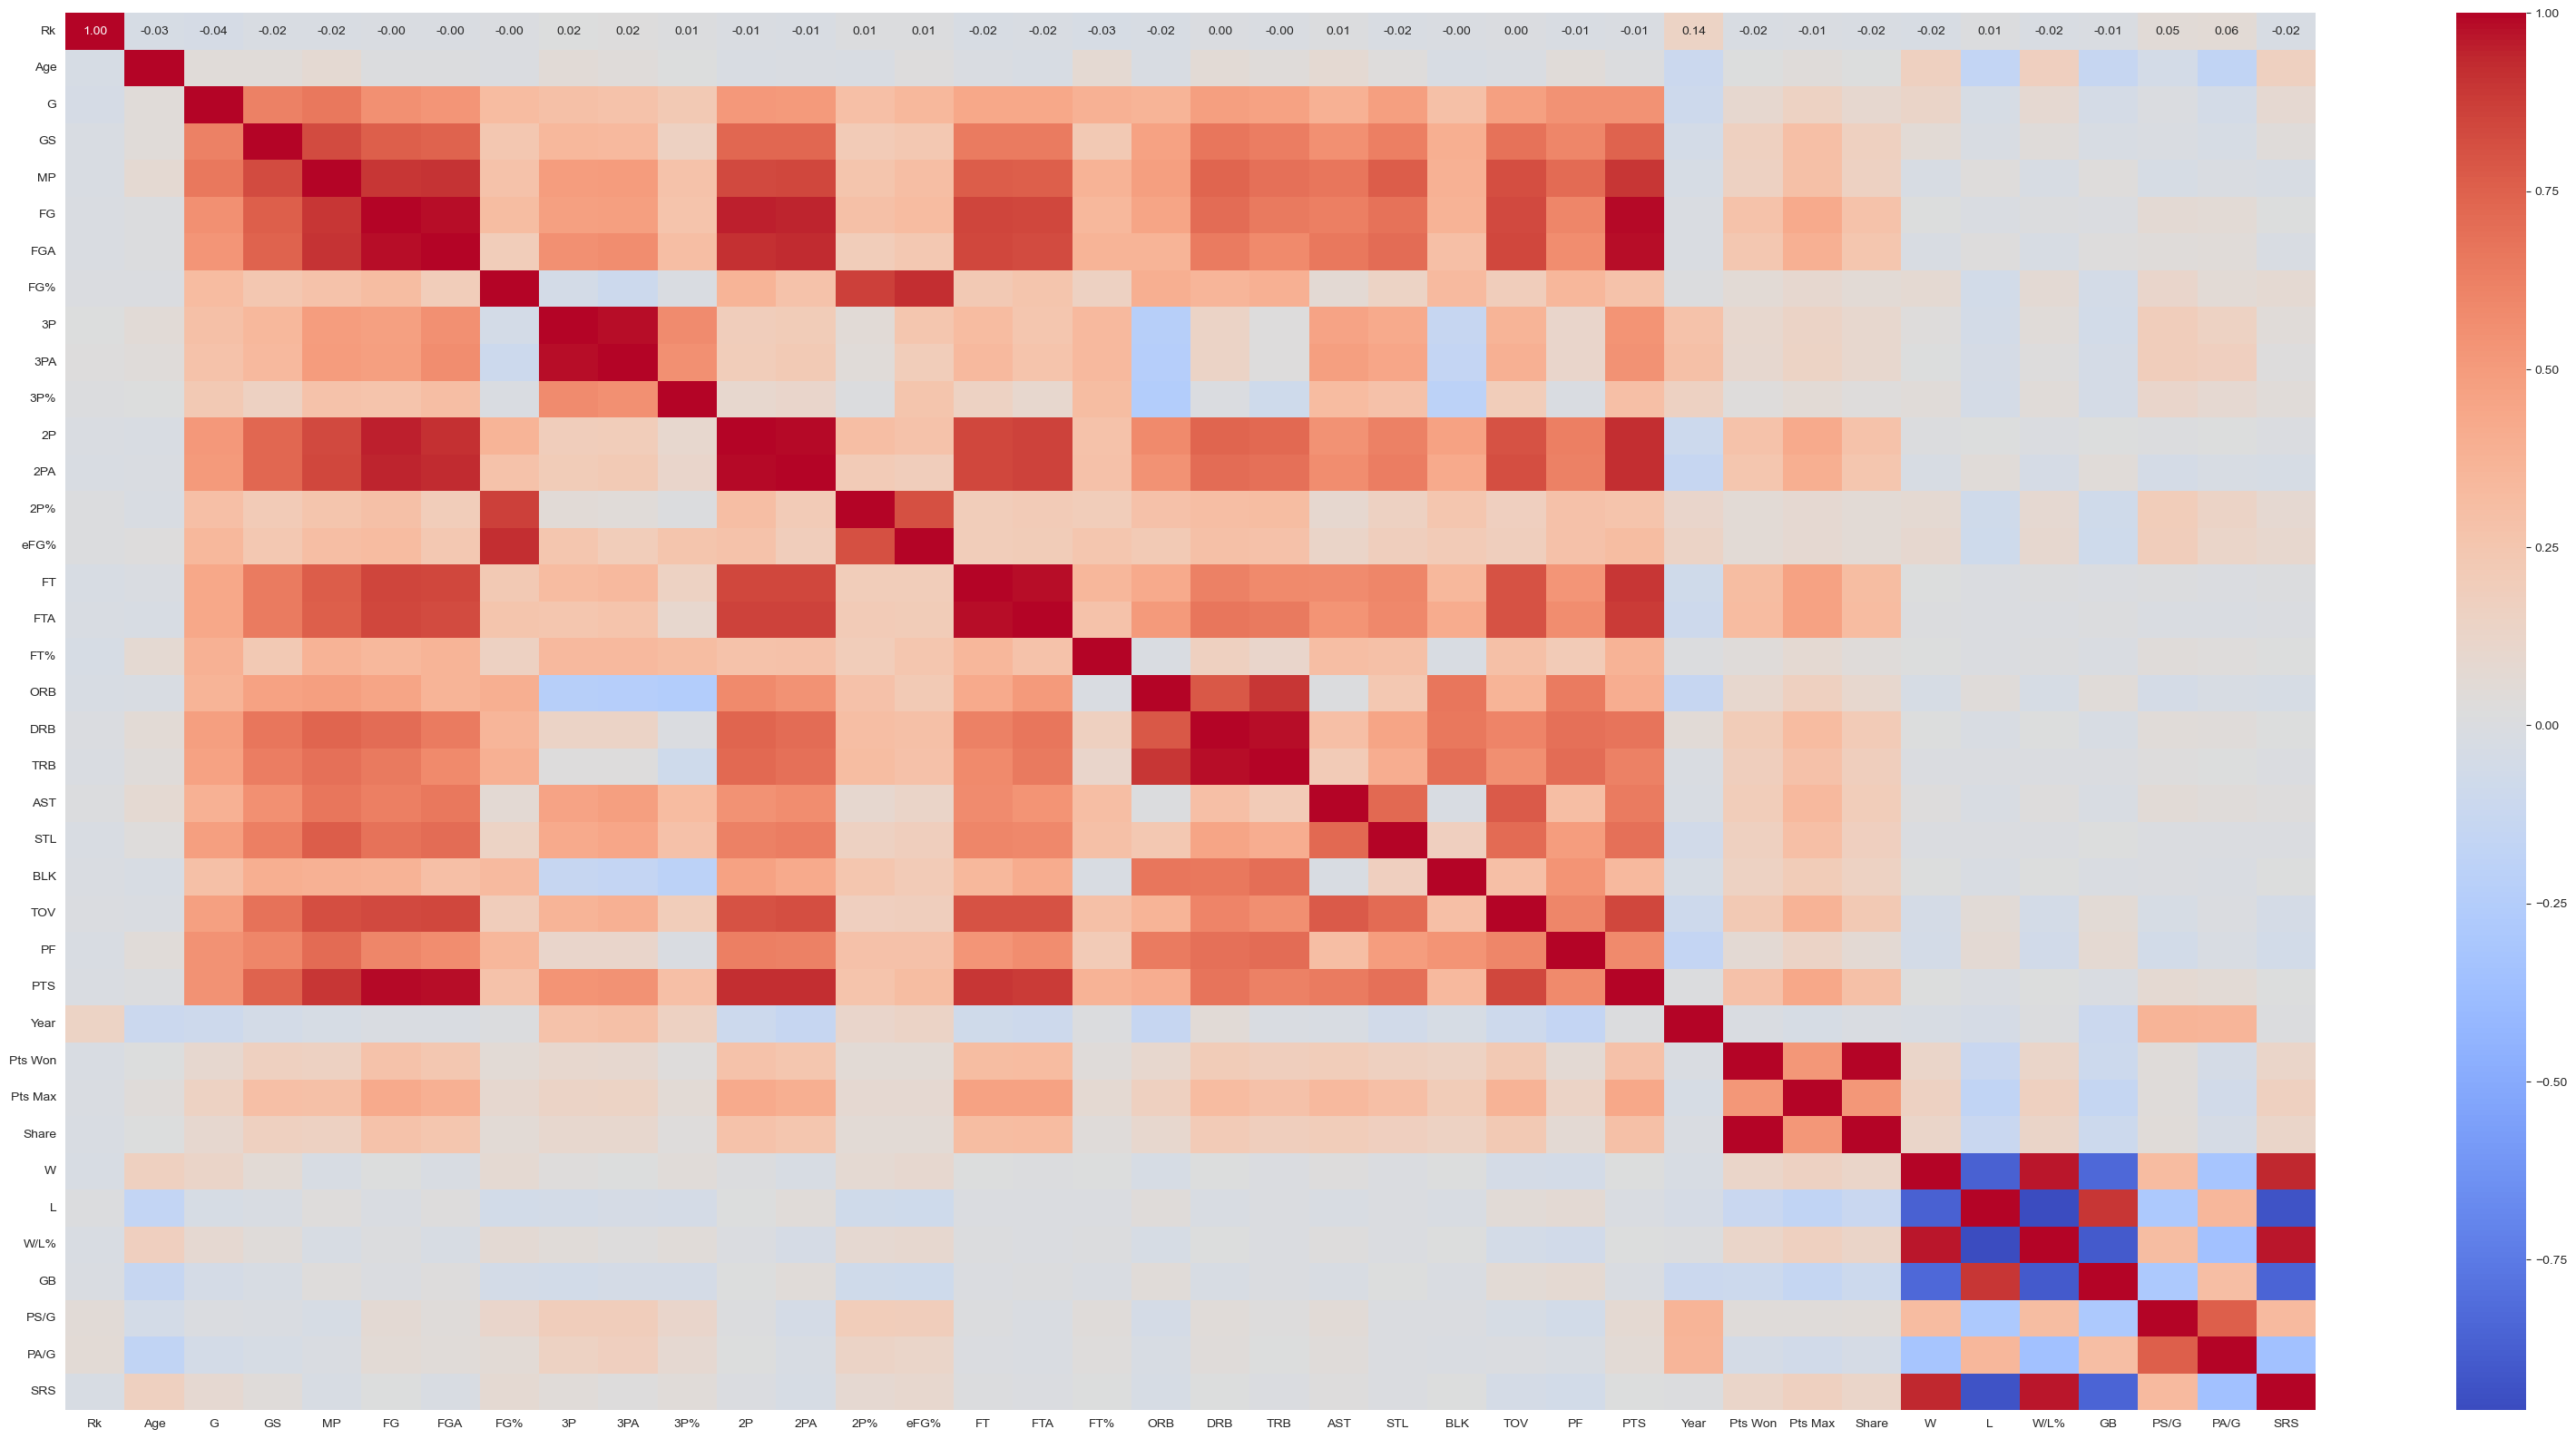

In [414]:
corr_matrix = stats.corr(numeric_only=True)
plt.figure(figsize=[40,20])
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

In [415]:
stats.isnull().any()

Rk         False
Player     False
Pos        False
Age        False
Tm         False
G          False
GS         False
MP         False
FG         False
FGA        False
FG%        False
3P         False
3PA        False
3P%        False
2P         False
2PA        False
2P%        False
eFG%       False
FT         False
FTA        False
FT%        False
ORB        False
DRB        False
TRB        False
AST        False
STL        False
BLK        False
TOV        False
PF         False
PTS        False
Year       False
Pts Won    False
Pts Max    False
Share      False
Team       False
W          False
L          False
W/L%       False
GB         False
PS/G       False
PA/G       False
SRS        False
dtype: bool

### 2) Making the predictions

In [416]:
stats2 = stats.copy()

In [417]:
predictors = ['Rk', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
        'W', 'L', 'W/L%', 'GB', 'PS/G',
       'PA/G', 'SRS']

2.1) Applying the model

In [418]:
train = stats2[stats2["Year"] < 2021]
test = stats2[stats2["Year"] == 2021]

In [419]:
reg = Ridge(alpha=0.1)

In [420]:
reg.fit(train[predictors], train["Share"])

Ridge(alpha=0.1)

In [421]:
preds = reg.predict(test[predictors])

In [422]:
preds = pd.DataFrame(preds, columns=["Predictions"], index=test.index)

In [423]:
preds

,Predictions
841,0.014347
842,-0.015042
843,0.005142
844,-0.003731
845,0.008367
...,...
13897,-0.015112
13898,-0.013418
13899,0.014522
13900,-0.019564


2.2) Combining data with the results

In [424]:
results = pd.concat([test[["Player", "Share"]], preds], axis=1)

In [425]:
results = results.sort_values("Share", ascending=False)
results["Rk"] = list(range(1, results.shape[0]+1))

In [426]:
results = results.sort_values("Predictions", ascending=False)
results["Predicted_Rk"] = list(range(1, results.shape[0]+1))

In [427]:
results.head(10)

,Player,Share,Predictions,Rk,Predicted_Rk
9974,Giannis Antetokounmpo,0.345,0.209132,4,1
8691,Joel Embiid,0.580,0.163361,2,2
852,Nikola Joki?,0.961,0.155226,1,3
11014,Luka Don?i?,0.042,0.153954,6,4
3845,LeBron James,0.001,0.144746,15,5
3760,Stephen Curry,0.449,0.141344,3,6
4286,Kevin Durant,0.000,0.141050,531,7
4283,James Harden,0.001,0.140650,13,8
11784,Zion Williamson,0.000,0.126353,251,9
3985,Russell Westbrook,0.005,0.117032,11,10


In [428]:
results.sort_values("Share", ascending=False).head(10)

,Player,Share,Predictions,Rk,Predicted_Rk
852,Nikola Joki?,0.961,0.155226,1,3
8691,Joel Embiid,0.580,0.163361,2,2
3760,Stephen Curry,0.449,0.141344,3,6
9974,Giannis Antetokounmpo,0.345,0.209132,4,1
1585,Chris Paul,0.138,0.069577,5,33
11014,Luka Don?i?,0.042,0.153954,6,4
7547,Damian Lillard,0.038,0.114865,7,12
3645,Julius Randle,0.020,0.088918,8,24
3640,Derrick Rose,0.010,0.029877,9,79
11358,Rudy Gobert,0.008,0.095745,10,19


2.3) Evaluating the model

In [429]:
def find_ap(results):
    real = results.sort_values("Share", ascending=False).head(5)
    predicted = results.sort_values("Predictions", ascending=False)
    ps = []
    found = 0
    seen = 1
    for i, row in predicted.iterrows():
        if row["Player"] in real["Player"].values:
            found += 1
            ps.append(found/seen)
        seen += 1
    return sum(ps) / len(ps)

In [430]:
find_ap(results)

0.7636363636363636

2.4) Making the predictions for every season since 1996

In [431]:
years = list(range(1991,2022))

In [432]:
def add_ranks(results):
    results = results.sort_values("Share", ascending=False)
    results["Rk"] = list(range(1, results.shape[0]+1))
    
    results = results.sort_values("Predictions", ascending=False)
    results["Predicted_Rk"] = list(range(1, results.shape[0]+1))
    
    results["Difference"] = results["Rk"] - results["Predicted_Rk"]
    return results

In [433]:
def get_eval(stats, model, years, predictors):
    aps = []
    all_preds = []
    for y in years[5:]:
        train = stats[stats["Year"] < y]
        test = stats[stats["Year"] == y]
        model.fit(train[predictors], train["Share"])
        preds = model.predict(test[predictors])
        preds = pd.DataFrame(preds, columns=["Predictions"], index=test.index)
        results = pd.concat([test[["Player", "Share"]], preds], axis=1)
        results = add_ranks(results)
        all_preds.append(results)
        aps.append(find_ap(results))
    return sum(aps) / len(aps), aps, pd.concat(all_preds)

In [434]:
mean_ap, aps, all_preds = get_eval(stats, reg, years[5:], predictors)

In [435]:
mean_ap

0.7350080493945432

In [436]:
all_preds[all_preds["Rk"] <= 5].sort_values("Difference").head(15)

,Player,Share,Predictions,Rk,Predicted_Rk,Difference
1420,Jason Kidd,0.712,0.028590,2,54,-52
5272,Steve Nash,0.839,0.033006,1,46,-45
5290,Steve Nash,0.739,0.052503,1,35,-34
12726,Joakim Noah,0.258,0.046588,4,37,-33
8583,Peja Stojakovi?,0.228,0.037967,4,34,-30
3766,Chauncey Billups,0.344,0.055350,5,34,-29
1585,Chris Paul,0.138,0.069577,5,33,-28
5305,Steve Nash,0.785,0.072172,2,23,-21
11490,Tony Parker,0.274,0.074480,5,16,-11
5353,Carmelo Anthony,0.393,0.083139,3,13,-10


In [437]:
pd.concat([pd.Series(reg.coef_), pd.Series(predictors)], axis=1).sort_values(0, ascending=False)

,0,1
13,0.072132,eFG%
18,0.035535,DRB
29,0.028498,W/L%
17,0.021561,ORB
10,0.017136,2P
21,0.011283,STL
22,0.011036,BLK
15,0.011034,FTA
20,0.007598,AST
25,0.005882,PTS


In [438]:
stat_ratios = stats[["Year", "PTS", "AST", "STL", "BLK", "3P"]].groupby("Year").apply(lambda x: x/x.mean())

In [439]:
stat_ratios = stat_ratios.set_index(stats.index)

In [440]:
stats[["PTS_Ratio", "AST_Ratio", "STL_Ratio", "BLK_Ratio", "3P_Ratio"]] = stat_ratios[["PTS", "AST", "STL", "BLK", "3P"]]

In [441]:
stats

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,W/L%,GB,PS/G,PA/G,SRS,PTS_Ratio,AST_Ratio,STL_Ratio,BLK_Ratio,3P_Ratio
0,355,?an Tabak,C,24,HOU,37,0,4.9,0.6,1.4,...,0.573,15.0,103.5,101.4,2.32,1.013334,0.420714,0.961127,0.673469,0.508587
1,53,Adrian Caldwell,PF,28,HOU,7,0,4.3,0.1,0.6,...,0.573,15.0,103.5,101.4,2.32,1.614653,1.028412,1.647646,0.673469,4.577279
2,159,Carl Herrera,PF,28,HOU,61,26,21.8,2.8,5.4,...,0.573,15.0,103.5,101.4,2.32,0.311795,0.093492,0.274608,1.571429,0.000000
3,183,Charles Jones,PF,37,HOU,3,0,12.0,0.3,1.0,...,0.573,15.0,103.5,101.4,2.32,0.200440,0.186984,0.274608,0.000000,0.000000
4,42,Chucky Brown,SF,26,HOU,41,14,19.9,2.6,4.2,...,0.573,15.0,103.5,101.4,2.32,2.383005,1.636110,1.784950,0.897959,1.525760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14087,185,Spencer Hawes,PF,28,MIL,54,1,14.8,2.5,5.1,...,0.512,9.0,103.6,103.8,-0.45,1.207728,1.207491,0.971223,0.000000,2.393794
14088,331,Steve Novak,PF,33,MIL,8,0,2.8,0.3,0.9,...,0.512,9.0,103.6,103.8,-0.45,0.257201,0.201248,0.647482,0.240964,0.099741
14089,239,Terrence Jones,PF,25,MIL,54,12,23.5,4.3,9.1,...,0.512,9.0,103.6,103.8,-0.45,1.274824,0.704370,1.133094,1.445783,1.695604
14090,281,Thon Maker,C,19,MIL,57,34,9.9,1.5,3.2,...,0.512,9.0,103.6,103.8,-0.45,0.279567,0.553433,0.323741,0.000000,0.099741


In [442]:
predictors += ["PTS_Ratio", "AST_Ratio", "STL_Ratio", "BLK_Ratio", "3P_Ratio"]

In [443]:
mean_ap, aps, all_preds = get_eval(stats, reg, years[5:], predictors)

In [444]:
mean_ap

0.7417103361269289

In [445]:
rfr = RandomForestRegressor(n_estimators=150, random_state=42, min_samples_split=5)

In [446]:
mean_ap, aps, all_preds = get_eval(stats, rfr, years[5:], predictors)

In [447]:
mean_ap

0.7241318170829449

In [448]:
all_preds[all_preds["Rk"] <= 5].sort_values("Difference").head(15)

,Player,Share,Predictions,Rk,Predicted_Rk,Difference
12726,Joakim Noah,0.258,0.000485,4,38,-34
1420,Jason Kidd,0.712,0.011892,2,22,-20
12138,Kevin Garnett,0.532,0.012871,3,21,-18
1585,Chris Paul,0.138,0.035172,5,22,-17
3766,Chauncey Billups,0.344,0.025061,5,19,-14
11696,Nikola Joki?,0.210,0.033553,4,18,-14
2410,Jermaine O'Neal,0.425,0.008965,3,16,-13
5272,Steve Nash,0.839,0.077581,1,13,-12
10351,Tim Duncan,0.222,0.046040,4,15,-11
10335,Tim Duncan,0.258,0.065501,4,15,-11


### 3) Conclusion
As we can see predicting the NBA MVP sometimes can be difficult to predict due to many complicated factors. One year voters go with the best player on the best team, next year they value individual stats more. Also, the story can play a huge role as well as the voter's fatigue. Our models mainly struggled with evaluating point guards and defensive-oriented big man. That's probably due to the fact those type of players impact the game much more than their stats show. Also, most of those missed prediction come from mid 2000s, where the scoring was much lower than in today's game so it makes sense that the model valued players who scored much more compared to their peers.